# Práctica 01 - 15/03/2023

## Grupo: 6CV3  
## Materia: Machine Learning
## Integrantes:
# * PEREZ MONDRAGON EDUARDO
# * ROSILES HIDALGO EMANUEL 

In [2]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [3]:
# Iris-Setosa -> 1:50
# Iris-Versicolor -> 51:80
# Iris-Virginica -> 81:111
IrisDB = pd.read_csv("IrisPlant_modificada.csv")
print(IrisDB.iloc[80:115,:])

     sepal length  sepal width  petal length  petal width           class
80            6.3          3.3           6.0          2.5  Iris-virginica
81            5.8          2.7           NaN          1.9  Iris-virginica
82            7.1          3.0           5.9          2.1  Iris-virginica
83            6.3          2.9           5.6          1.8  Iris-virginica
84            6.5          3.0           5.8          2.2  Iris-virginica
85            7.6          3.0           6.6          2.1  Iris-virginica
86            NaN          2.5           4.5          1.7  Iris-virginica
87            7.3          2.9           6.3          1.8  Iris-virginica
88            6.7          2.5           5.8          1.8  Iris-virginica
89            7.2          3.6           6.1          NaN  Iris-virginica
90            6.5          3.2           5.1          2.0  Iris-virginica
91            6.9          3.2           NaN          2.3  Iris-virginica
92            5.6          2.8        

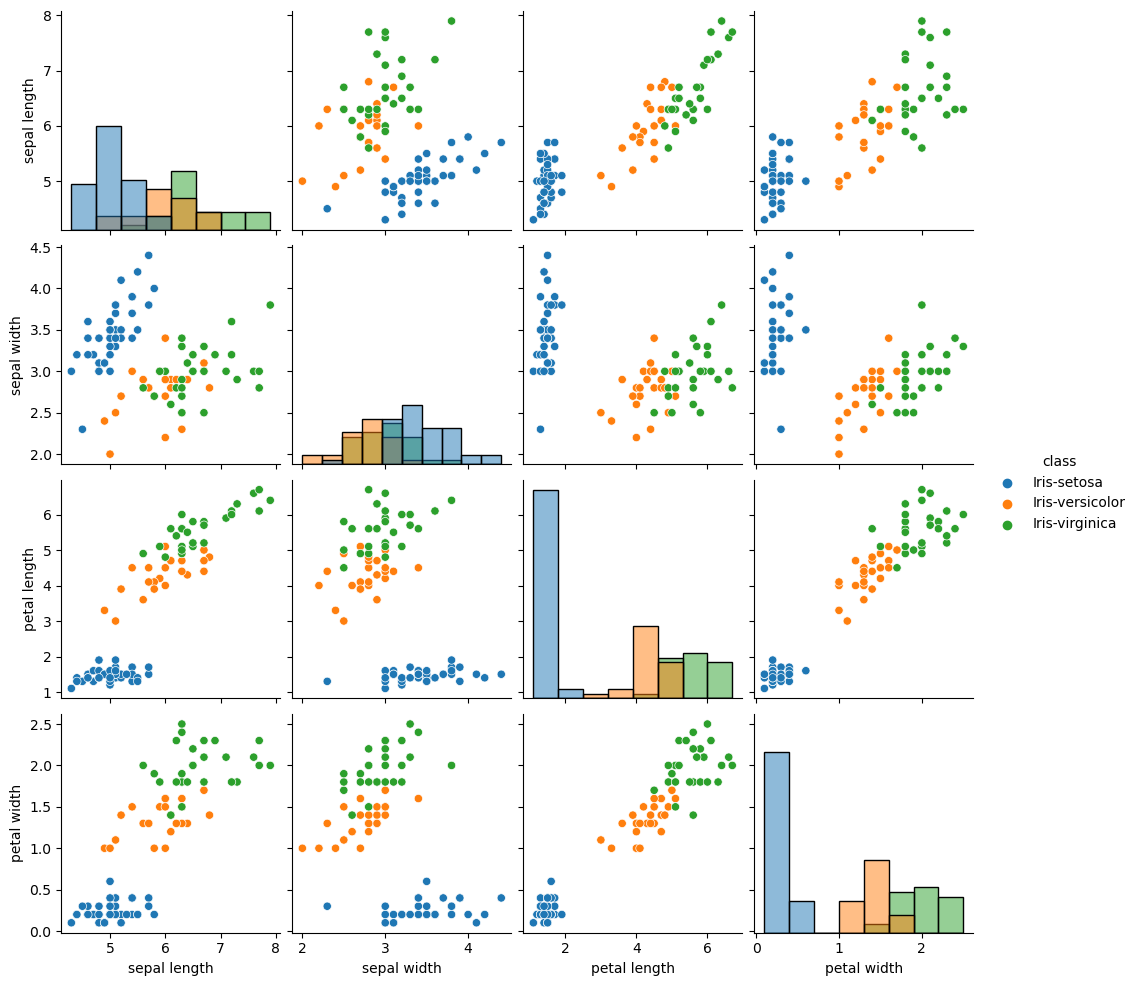

In [4]:
sns.pairplot(IrisDB, hue="class", diag_kind="hist")

Eliminar los valores perdidos que contenga el banco de datos. HINT: usar el simple imputer de sklearn. Punto extra si realizan la imputación por clase y no por todo el banco de datos.

In [5]:
# Se crean tres DataFrames que contienen las filas correspondientes a cada clase de flor, excluyendo el rasgo de la clase
df_Set = IrisDB[IrisDB.iloc[:,4] == 'Iris-setosa'].iloc[:,:4]
df_Ver = IrisDB[IrisDB.iloc[:,4] == 'Iris-versicolor'].iloc[:,:4]
df_Vir = IrisDB[IrisDB.iloc[:,4] == 'Iris-virginica'].iloc[:,:4]

# Configuracion de SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

# Calculo de la media de cada columna en df_Set
imputer = imputer.fit(df_Set)
# Se aplica la media de cada columna en df_Set a todas los valores faltantes (NaN)
dfSet = pd.DataFrame(imputer.transform(df_Set), columns = IrisDB.columns[:4])
# Se agrega el rasgo de clase al nuevo dataframe ya sin valores NaN
dfSet['class'] = 'Iris-setosa'

imputer = imputer.fit(df_Ver)
dfVer = pd.DataFrame(imputer.transform(df_Ver), columns = IrisDB.columns[:4])
dfVer['class'] = 'Iris-versicolor'

imputer = imputer.fit(df_Vir)
dfVir = pd.DataFrame(imputer.transform(df_Vir), columns = IrisDB.columns[:4])
dfVir['class'] = 'Iris-virginica'

# Concatenacion o 'mezcla' de los 3 dataframes rellenados con SimpleImputer (sin valores NaN)
IrisDBImputada = pd.concat([dfSet, dfVer, dfVir], ignore_index=True)

print(IrisDBImputada)

     sepal length  sepal width  petal length  petal width           class
0        5.100000     3.500000           1.4          0.2     Iris-setosa
1        5.019149     3.000000           1.4          0.2     Iris-setosa
2        4.700000     3.200000           1.3          0.2     Iris-setosa
3        4.600000     3.436364           1.5          0.2     Iris-setosa
4        5.000000     3.600000           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
106      6.700000     3.000000           5.2          2.3  Iris-virginica
107      6.300000     2.500000           5.0          1.9  Iris-virginica
108      6.500000     3.000000           5.2          2.0  Iris-virginica
109      6.200000     2.980000           5.4          2.3  Iris-virginica
110      5.900000     3.000000           5.1          1.8  Iris-virginica

[111 rows x 5 columns]


Sobre el banco de datos ya sin valores perdidos, usar algún método para detección de patrones atípicos. Puede ser edición de Wilson o usando la media y desviación estandar como en el ejemplo que se tiene en las diapositivas. Escoger uno de los rasgo para realizar los cálculos. Punto extra si lo hacen por clase y no por todo el banco de datos

In [6]:
# CÓDIGO PARA HACER LA DETECCIÓN DE PATRONES ATIPICOS

# Creacion de arreglo con las clases existentes en el dataset para su manipulacion
clases = IrisDB['class'].unique()

for i in range(len(IrisDBImputada['class'].unique())):
    cont_Atipicos = 0
    cont_No_Atipicos = 0
    media = desvStd = rangoMin = rangoMax = 0
    media = IrisDBImputada.loc[IrisDBImputada['class'] == clases[i], 'sepal length'].mean()
    desvStd = IrisDBImputada.loc[IrisDBImputada['class'] == clases[i], 'sepal length'].std()
    rangoMin = media - desvStd
    rangoMax = media + desvStd

    print(f"--> {clases[i]} <--")
    print("Media: " + str(media))
    print("Desviacion estandar: " + str(desvStd))
    print("Rango min: " + str(rangoMin))
    print("Rango max: " + str(rangoMax) + '\n')

    # Recorrido de cada patron en el dataset para la deteccion de patrones atipicos
    for indice, patron in IrisDBImputada.loc[IrisDBImputada['class'] == clases[i]].iterrows():
        # Deteccion de patrones atipicos con base al rasgo sepal length
        format_sepal_length = "{:.2f}".format(patron['sepal length'])
        if (rangoMin < patron['sepal length'] < rangoMax):
            print(f"{indice} : {format_sepal_length}\t NO atipico")
            cont_No_Atipicos += 1
        else:
            print(f"{indice} : {format_sepal_length}\t Atipico")
            cont_Atipicos += 1

    print("\nNo. Patrones Atipicos: " + str(cont_Atipicos))
    print("No. Patrones NO Atipicos: " + str(cont_No_Atipicos) + '\n')

--> Iris-setosa <--
Media: 5.019148936170212
Desviacion estandar: 0.34085025611073144
Rango min: 4.678298680059481
Rango max: 5.359999192280943

0 : 5.10	 NO atipico
1 : 5.02	 NO atipico
2 : 4.70	 NO atipico
3 : 4.60	 Atipico
4 : 5.00	 NO atipico
5 : 5.40	 Atipico
6 : 4.60	 Atipico
7 : 5.00	 NO atipico
8 : 4.40	 Atipico
9 : 4.90	 NO atipico
10 : 5.40	 Atipico
11 : 4.80	 NO atipico
12 : 4.80	 NO atipico
13 : 4.30	 Atipico
14 : 5.80	 Atipico
15 : 5.70	 Atipico
16 : 5.40	 Atipico
17 : 5.02	 NO atipico
18 : 5.70	 Atipico
19 : 5.10	 NO atipico
20 : 5.40	 Atipico
21 : 5.10	 NO atipico
22 : 4.60	 Atipico
23 : 5.10	 NO atipico
24 : 4.80	 NO atipico
25 : 5.00	 NO atipico
26 : 5.00	 NO atipico
27 : 5.20	 NO atipico
28 : 5.20	 NO atipico
29 : 4.70	 NO atipico
30 : 4.80	 NO atipico
31 : 5.40	 Atipico
32 : 5.20	 NO atipico
33 : 5.50	 Atipico
34 : 4.90	 NO atipico
35 : 5.00	 NO atipico
36 : 5.50	 Atipico
37 : 4.90	 NO atipico
38 : 5.02	 NO atipico
39 : 5.10	 NO atipico
40 : 5.00	 NO atipico
41 : 4.5

In [7]:
# CÓDIGO PARA SEPARAR LOS RASGOS DE LA CLASE, YA QUE PARA ALGUNOS MÉTODOS SE NECESITA. EL OBJETO IrisNoMissValues 
# DEBE SER EL QUE CONTENGA EL BANCO DE DATOS SIN VALORES PERDIDOS

X = IrisDBImputada.iloc[:,:4]
print(X)
y = IrisDBImputada["class"]
print(y)

     sepal length  sepal width  petal length  petal width
0        5.100000     3.500000           1.4          0.2
1        5.019149     3.000000           1.4          0.2
2        4.700000     3.200000           1.3          0.2
3        4.600000     3.436364           1.5          0.2
4        5.000000     3.600000           1.4          0.2
..            ...          ...           ...          ...
106      6.700000     3.000000           5.2          2.3
107      6.300000     2.500000           5.0          1.9
108      6.500000     3.000000           5.2          2.0
109      6.200000     2.980000           5.4          2.3
110      5.900000     3.000000           5.1          1.8

[111 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
106    Iris-virginica
107    Iris-virginica
108    Iris-virginica
109    Iris-virginica
110    Iris-virginica
Name: class, Length: 111, dtype: objec

In [11]:
ValuesPerClass = IrisDBImputada["class"].value_counts()
print(type(ValuesPerClass))
print(ValuesPerClass)

<class 'pandas.core.series.Series'>
Iris-setosa        50
Iris-virginica     31
Iris-versicolor    30
Name: class, dtype: int64


Usando los valores de la celda anterior calcular IR (Imbalance Ratio) para determinar si existe desbalance de clase, IR > 1.5 indica desbalance de clases

In [12]:
# CÓDIGO PARA CALCULAR EL IR (IMBALANCE RATE)
IR = ValuesPerClass[0]/ValuesPerClass[2]
IR

1.6666666666666667

En caso de que el banco de datos presente desbalance de clase usar un método de oversampling para balancear el banco de datos. HINT: usar el método SMOTE de la biblioteca imblearn

In [13]:
# CÓDIGO PARA REALIZAR EL OVERSAMPLING DEL BANCO DE DATOS

# Creación del objeto SMOTE
oversample = SMOTE()

# Creación de un objeto SMOTE con parámetros específicos
#    sampling_strategy = 'auto' indica que se debe aumentar el tamaño de la muestra de la 
#                               clase minoritaria para que tenga la misma cantidad de muestras que la clase mayoritaria
#    k_neighbors = 1 indica que se debe utilizar 1 vecino más cercano para generar nuevos datos sintéticos.
#    random_state = 100 se establece un valor de semilla para reproducir los mismos resultados cada vez que se ejecute el código

sm = SMOTE(sampling_strategy='auto', k_neighbors = 1, random_state = 100)

# El metodo fit_resample ajusta el modelo SMOTE a los datos de entrada y 
# luego genera nuevos datos sintéticos para aumentar la cantidad de muestras de la clase minoritaria.

X, y = sm.fit_resample(X, y)

print(X)
print(y)

     sepal length  sepal width  petal length  petal width
0        5.100000     3.500000      1.400000     0.200000
1        5.019149     3.000000      1.400000     0.200000
2        4.700000     3.200000      1.300000     0.200000
3        4.600000     3.436364      1.500000     0.200000
4        5.000000     3.600000      1.400000     0.200000
..            ...          ...           ...          ...
145      6.300000     2.640225      4.929888     1.829888
146      7.156875     3.113749      5.956875     1.929376
147      6.217862     2.817862      5.591200     1.800000
148      7.146743     3.093485      5.946743     1.959772
149      6.335331     2.970662      5.564669     1.800000

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: objec

In [14]:
ValuesPerClass = y.value_counts()
print(type(ValuesPerClass))
print(ValuesPerClass)

<class 'pandas.core.series.Series'>
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


In [15]:
IR = ValuesPerClass[0]/ValuesPerClass[2]
IR

1.0

In [16]:
print(X.iloc[::])

     sepal length  sepal width  petal length  petal width
0        5.100000     3.500000      1.400000     0.200000
1        5.019149     3.000000      1.400000     0.200000
2        4.700000     3.200000      1.300000     0.200000
3        4.600000     3.436364      1.500000     0.200000
4        5.000000     3.600000      1.400000     0.200000
..            ...          ...           ...          ...
145      6.300000     2.640225      4.929888     1.829888
146      7.156875     3.113749      5.956875     1.929376
147      6.217862     2.817862      5.591200     1.800000
148      7.146743     3.093485      5.946743     1.959772
149      6.335331     2.970662      5.564669     1.800000

[150 rows x 4 columns]
